### DSC 640 Week  : 
#### Exercise 3 & 4
#### Author: Brian Reppeto 12/7/2024

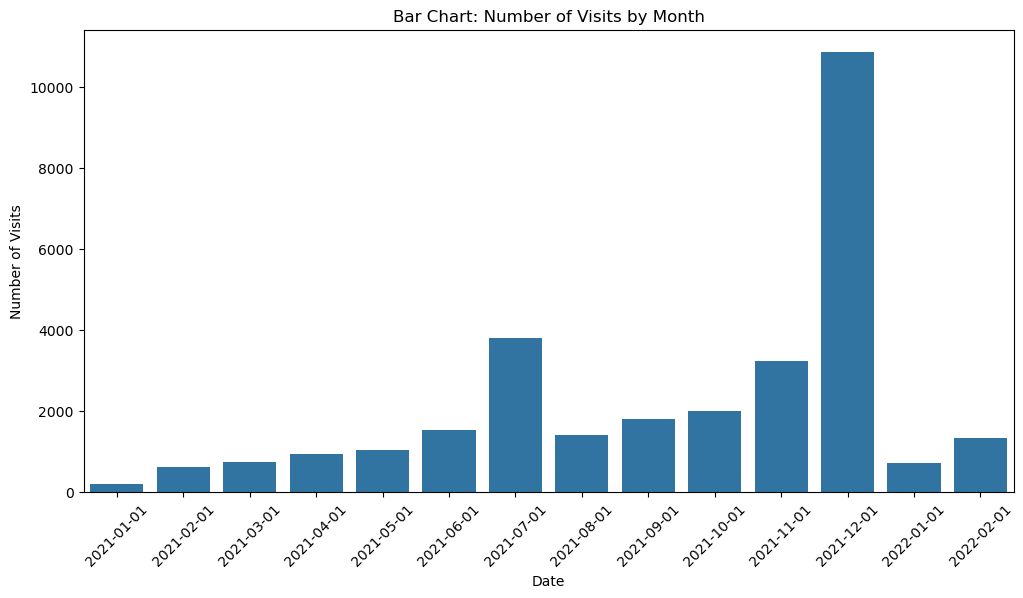

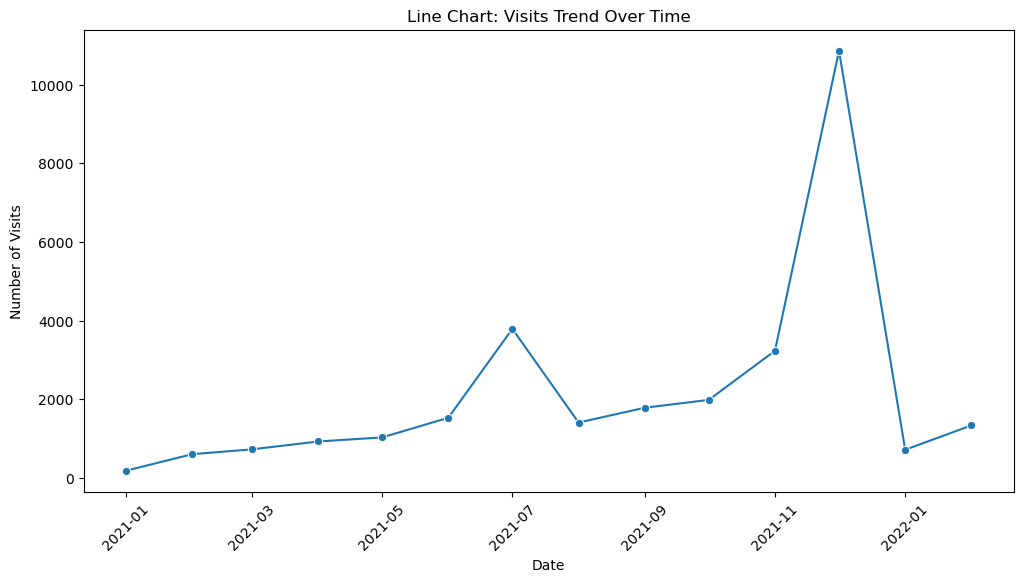

<Figure size 1200x600 with 0 Axes>

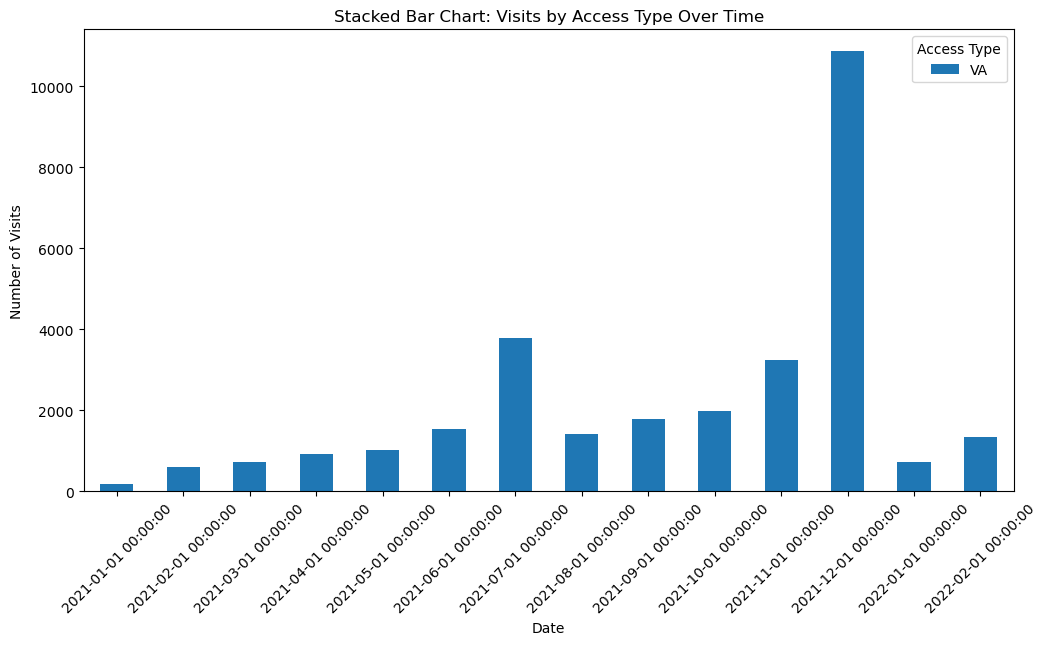

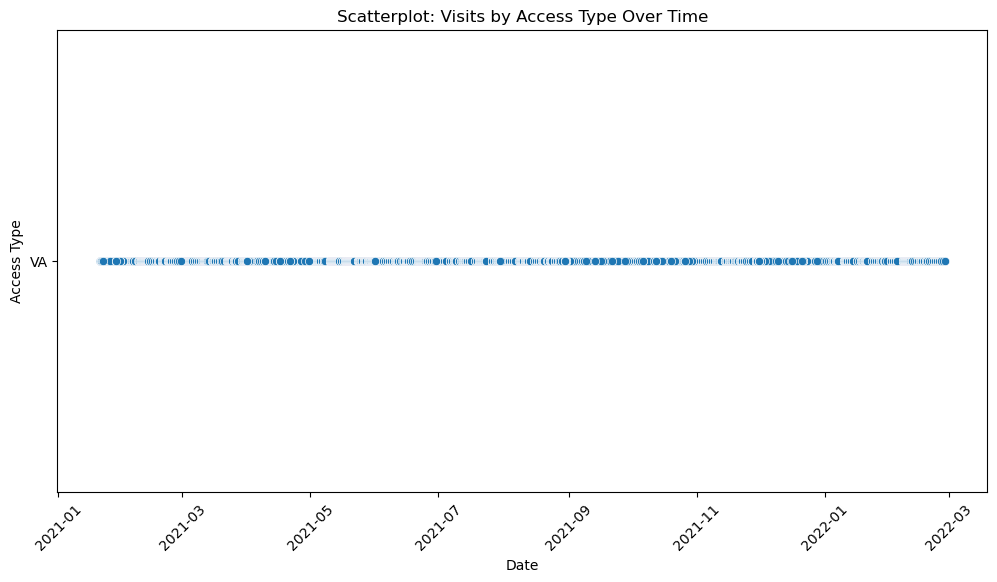

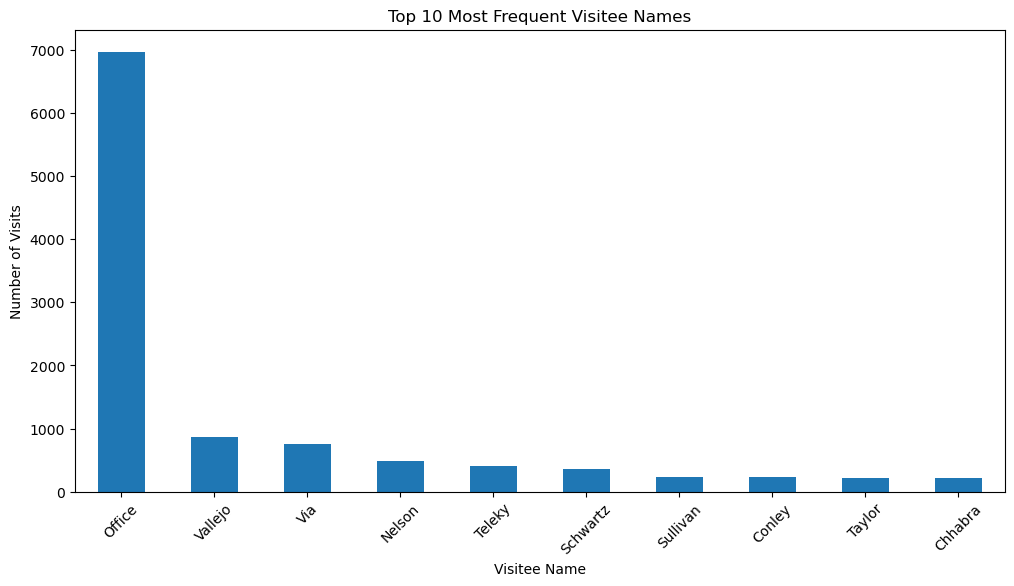

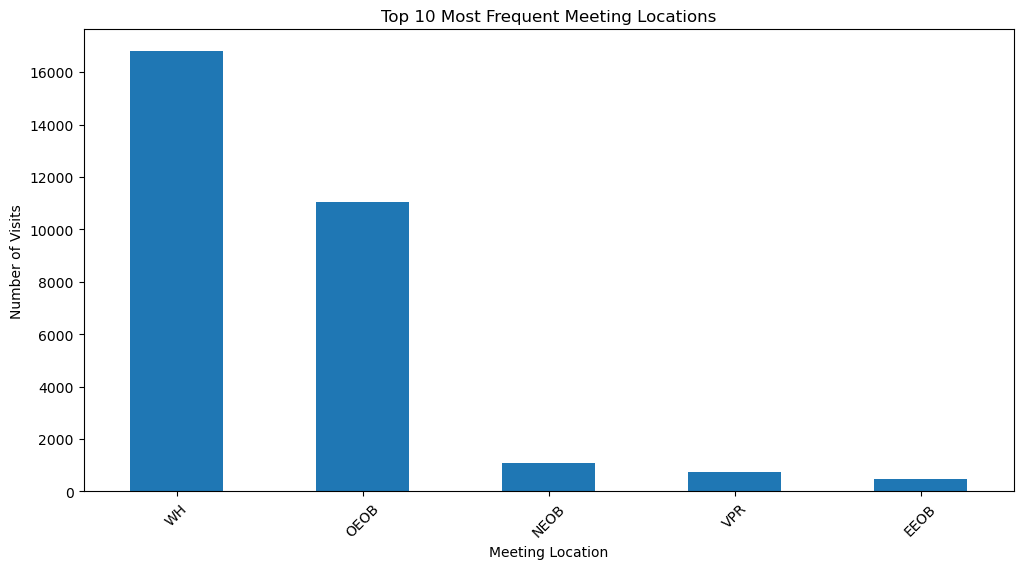

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
files = [
    "Weeks3&4Exercise/2021_WAVES-ACCESS-RECORDS White House.csv",
    "Weeks3&4Exercise/2022.01_WAVES-ACCESS-RECORDS.csv",
    "Weeks3&4Exercise/2022.02_WAVES-ACCESS-RECORDS.csv",
    "Weeks3&4Exercise/2022.03_WAVES-ACCESS-RECORDS-.csv",
    "Weeks3&4Exercise/2022.04_WAVES-ACCESS-RECORDS.csv",
    "Weeks3&4Exercise/2022.05-WAVES-ACCESS-RECORDS.csv",
]

dfs = [pd.read_csv(file) for file in files]

# Combine all datasets into one DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Clean column names
combined_df.columns = combined_df.columns.str.strip()

# Convert TOA and RELEASEDATE to datetime
combined_df['TOA'] = pd.to_datetime(combined_df['TOA'], errors='coerce')
combined_df['RELEASEDATE'] = pd.to_datetime(combined_df['RELEASEDATE'], errors='coerce')

# Create new columns for year and month
combined_df['Year'] = combined_df['TOA'].dt.year
combined_df['Month'] = combined_df['TOA'].dt.month

# Drop rows without valid TOA data
cleaned_df = combined_df.dropna(subset=['TOA'])

# Group visits by month
visits_by_month = cleaned_df.groupby(['Year', 'Month']).size().reset_index(name='Visits')
visits_by_month['Date'] = pd.to_datetime(visits_by_month[['Year', 'Month']].assign(DAY=1))

# Visualization 1: Bar Chart of Visits by Month
plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='Visits', data=visits_by_month)
plt.xticks(rotation=45)
plt.title('Bar Chart: Number of Visits by Month')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.show()

# Visualization 2: Line Chart of Visits Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Visits', data=visits_by_month, marker='o')
plt.xticks(rotation=45)
plt.title('Line Chart: Visits Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.show()

# Visualization 3: Stacked Bar Chart of Visits by Access Type Over Time
access_by_month = cleaned_df.groupby(['Year', 'Month', 'ACCESS_TYPE']).size().reset_index(name='Count')
access_by_month['Date'] = pd.to_datetime(access_by_month[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(12, 6))
access_pivot = access_by_month.pivot_table(index='Date', columns='ACCESS_TYPE', values='Count', fill_value=0)
access_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Chart: Visits by Access Type Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.legend(title='Access Type')
plt.show()

# Visualization 4: Scatterplot of Visits Over Time by Access Type
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TOA', y='ACCESS_TYPE', data=cleaned_df)
plt.xticks(rotation=45)
plt.title('Scatterplot: Visits by Access Type Over Time')
plt.xlabel('Date')
plt.ylabel('Access Type')
plt.show()

# Visualization 5: Bar Chart of Most Frequent Visitee Names
top_visitees = cleaned_df['VISITEE_NAMELAST'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_visitees.plot(kind='bar')
plt.title('Top 10 Most Frequent Visitee Names')
plt.xlabel('Visitee Name')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.show()

# Visualization 6: Bar Chart of Most Frequent Meeting Locations
top_locations = cleaned_df['MEETING_LOC'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar')
plt.title('Top 10 Most Frequent Meeting Locations')
plt.xlabel('Meeting Location')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.show()
